In [44]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from scipy import sparse
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Train

In [15]:
train=pd.read_csv('data/train.csv')
train_des=train.describe()

In [16]:
train_des

,aid,uid,label
count,8.798814e+06,8.798814e+06,8.798814e+06
mean,1.044592e+03,4.126560e+07,-9.040868e-01
std,6.138768e+02,2.383198e+07,4.273488e-01
min,6.000000e+00,2.000000e+00,-1.000000e+00
25%,5.190000e+02,2.061748e+07,-1.000000e+00
50%,1.107000e+03,4.127522e+07,-1.000000e+00
75%,1.530000e+03,6.190352e+07,-1.000000e+00
max,2.216000e+03,8.254290e+07,1.000000e+00


从train 和test来看没有什么值得学习的

# Test

In [18]:
predict=pd.read_csv('data/test1.csv')
predict_des=predict.describe()

In [19]:
predict_des

,aid,uid
count,2.265989e+06,2.265989e+06
mean,1.044734e+03,4.127397e+07
std,6.138297e+02,2.383690e+07
min,6.000000e+00,8.000000e+00
25%,5.190000e+02,2.063520e+07
50%,1.107000e+03,4.127856e+07
75%,1.530000e+03,6.192064e+07
max,2.216000e+03,8.254288e+07


# 3. Ad

In [25]:
ad_feature=pd.read_csv('data/adFeature.csv')
ad_feature_pre=ad_feature.describe()

In [26]:
ad_feature.columns

Index(['aid', 'advertiserId', 'campaignId', 'creativeId', 'creativeSize',
       'adCategoryId', 'productId', 'productType'],
      dtype='object')

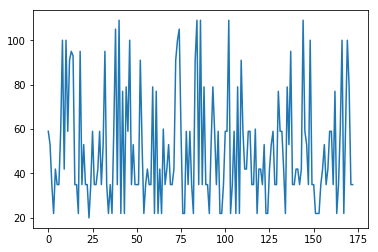

In [136]:
ad_feature.creativeSize.plot()

In [28]:
ad_feature_pre

,aid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType
count,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000
mean,1140.364162,13229.202312,159044.612717,9.388567e+05,50.364162,57.335260,2559.277457,7.346821
std,658.957025,23033.243589,184836.397583,5.211123e+05,24.827317,62.197012,5570.602765,2.827595
min,6.000000,60.000000,80.000000,5.977000e+03,20.000000,1.000000,0.000000,4.000000
25%,562.000000,702.000000,31020.000000,4.924840e+05,35.000000,21.000000,0.000000,4.000000
50%,1171.000000,7229.000000,76104.000000,9.818220e+05,42.000000,27.000000,0.000000,6.000000
75%,1728.000000,11487.000000,209098.000000,1.383456e+06,59.000000,67.000000,3733.000000,11.000000
max,2216.000000,158679.000000,766460.000000,1.806760e+06,109.000000,282.000000,28986.000000,11.000000


### Onehot 

In [32]:
OH=OneHotEncoder(sparse=False)
aid=OH.fit_transform(ad_feature.aid.values.reshape(-1,1))

In [37]:
ad_f=OH.fit_transform(ad_feature)

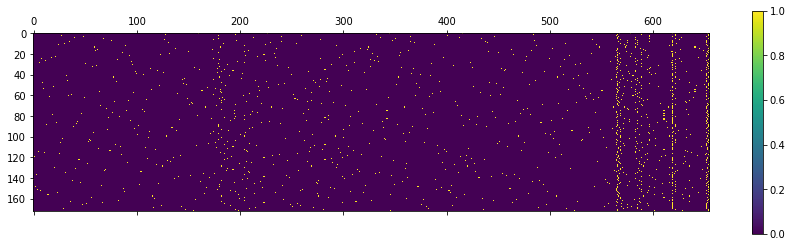

In [41]:
plt.matshow(ad_f)
plt.colorbar()
plt.show()

### ad 的onehot扩展成655维度

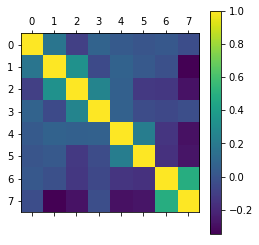

In [43]:
plt.matshow(ad_feature.corr())
plt.colorbar()
plt.show()

In [5]:
ad_feature.head()

,aid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType
0,177,8203,76104,1500666,59,282,0,6
1,2050,19441,178687,245165,53,1,0,6
2,1716,5552,158101,1080850,35,27,113,9
3,336,370,4833,119845,22,67,113,9
4,671,45705,352827,660519,42,67,0,4


### pca

In [57]:
pca=PCA(n_components=0.98)
pca.fit(ad_feature)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
#主成分
pca.components_.T

array([[-9.89406574e-05, -4.51989727e-04],
       [ 1.44696042e-03,  4.70127692e-02],
       [-1.04287538e-01,  9.93447339e-01],
       [-9.94545927e-01, -1.04106280e-01],
       [-3.43732951e-06,  6.75508115e-06],
       [ 4.94019061e-06, -4.11928699e-05],
       [ 6.36404447e-04, -3.72288572e-03],
       [ 1.85440174e-07, -4.53224846e-06]])

In [59]:
#主成分方差比率
pca.explained_variance_ratio_

array([0.89524091, 0.10315255])

## kernel pca

In [60]:
from sklearn.decomposition import KernelPCA

In [69]:
ker_pca=KernelPCA(n_components=2,kernel='rbf',gamma=0.01)
ker_pca.fit_transform(ad_f)

array([[ 8.94579011e-02,  3.17263048e-02],
       [ 8.25184911e-02,  1.63583314e-03],
       [-1.92969862e-01, -1.28799147e-01],
       [-1.39076425e-01, -1.06404464e-01],
       [ 9.86635954e-02, -3.02300254e-02],
       [-9.51486974e-02,  1.17882609e-01],
       [-1.77839117e-01, -1.16027868e-01],
       [-5.57867704e-02,  1.91149150e-01],
       [ 1.38932622e-01, -4.80516646e-02],
       [ 9.86635954e-02, -3.02300254e-02],
       [ 1.38932622e-01, -4.80516646e-02],
       [-5.18357365e-02,  1.73069798e-01],
       [ 1.36073390e-01, -4.65963654e-02],
       [ 9.13322120e-02,  1.34497265e-03],
       [-5.86251613e-02,  1.50841722e-01],
       [-1.12083553e-01, -4.93969364e-02],
       [-8.53590954e-02,  7.93142955e-02],
       [-7.49899150e-02, -4.12748809e-02],
       [ 8.97800282e-02,  2.11845303e-03],
       [-1.94143750e-01, -1.30541894e-01],
       [ 1.18117718e-01, -2.98625281e-02],
       [ 6.69145218e-03, -6.12687745e-02],
       [ 7.23719950e-02, -6.10886155e-02],
       [ 1.

## 增量pca
    当数据量比较大的时候可以用这个

## LDA

In [76]:
from sklearn.decomposition import LatentDirichletAllocation

In [82]:
lda=LatentDirichletAllocation()
lda.fit(ad_f)

F:\app\anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

# 4. 用户

In [92]:
user_features=pd.read_csv('data/user_feature-0.csv',index_col=0)

## topic

In [125]:
user_features.topic1.head()

0     9826 105 8525 5488 7281
1    4391 9140 5669 1348 4388
2    1502 5488 9826 2187 8088
3    1619 7342 3064 9213 8525
4      477 9826 5808 644 2747
Name: topic1, dtype: object

## 操作系统

In [108]:
os=user_features.os
os.head()

0      2
1      1
2      1
3    1 2
4      1
Name: os, dtype: object

In [116]:
cvt=LabelEncoder()

In [117]:
os_cv=cvt.fit_transform(os.values.reshape(-1,1))

F:\app\anaconda\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 近期安装

In [127]:
user_features.appIdInstall.dropna().head(5)

111      21699 50700 62170 10525 51634 43468 14885 34634
166    11927 55984 19563 18728 31684 17003 29323 1282...
168                                    45338 45738 45516
216    34634 41401 57271 43647 33598 8173 53629 16524...
230    10876 8355 888 45857 60760 29021 57649 4778 47...
Name: appIdInstall, dtype: object

In [98]:
user_features.corr()

,uid,age,gender,education,consumptionAbility,LBS,carrier,house
uid,1.000000,-0.003874,0.000048,0.002513,-0.000263,-0.001276,0.000270,NaN
age,-0.003874,1.000000,-0.049512,0.115250,-0.053355,-0.003171,-0.040213,NaN
gender,0.000048,-0.049512,1.000000,0.016039,0.084040,-0.002402,0.017519,NaN
education,0.002513,0.115250,0.016039,1.000000,0.112045,0.000471,0.180202,NaN
consumptionAbility,-0.000263,-0.053355,0.084040,0.112045,1.000000,0.018497,0.202957,NaN
LBS,-0.001276,-0.003171,-0.002402,0.000471,0.018497,1.000000,0.005974,NaN
carrier,0.000270,-0.040213,0.017519,0.180202,0.202957,0.005974,1.000000,NaN
house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


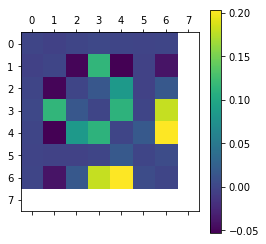

In [101]:
corr=user_features.corr()
corr[corr==1.0]=0.0
plt.matshow(corr)
plt.colorbar()
plt.show()

## 描述

In [93]:
user_features_des=user_features.describe()

In [94]:
user_features_des

,uid,age,gender,education,consumptionAbility,LBS,carrier,house
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000,200000.000000,36649.0
mean,4.138054e+07,3.018010,1.314770,4.536405,0.957125,444.816319,1.095805,1.0
std,2.384128e+07,1.517612,0.471371,2.441212,0.634144,285.168415,0.961302,0.0
min,5.500000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.074605e+07,2.000000,1.000000,2.000000,1.000000,192.000000,0.000000,1.0
50%,4.142476e+07,3.000000,1.000000,6.000000,1.000000,425.000000,1.000000,1.0
75%,6.213399e+07,4.000000,2.000000,7.000000,1.000000,687.000000,1.000000,1.0
max,8.254280e+07,5.000000,2.000000,7.000000,2.000000,997.000000,3.000000,1.0


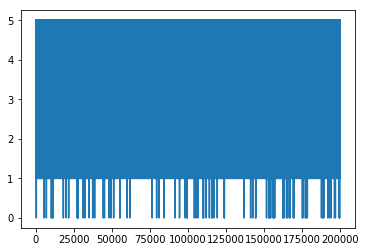

In [95]:
user_features.age.plot()